[![Binder](https://mybinder.org/badge_logo.svg)](https://nbviewer.org/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/contents/RGB_VQ/RGB_VQ.ipynb)

[![Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=notebook)](https://colab.research.google.com/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/contents/RGB_VQ/RGB_VQ.ipynb)

# [Vector Quantization (in the color domain) of a RGB image](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py)
Color VQ using [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

In [1]:
%%bash
if [ -d "$HOME/repos" ]; then
    echo "\"$HOME/repos\" exists"
else
    mkdir ~/repos
    echo Created $HOME/repos
fi

"/home/vruiz/repos" exists


In [2]:
%%bash
if [ -d "$HOME/repos/scalar_quantization" ]; then
    cd $HOME/repos/scalar_quantization
    echo "$HOME/repos/scalar_quantization ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/scalar_quantization.git
fi

/home/vruiz/repos/scalar_quantization ... 
Ya está actualizado.


In [3]:
%%bash
if [ -d "$HOME/repos/image_IO" ]; then
    cd $HOME/repos/image_IO
    echo "$HOME/repos/image_IO ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/image_IO.git
fi

/home/vruiz/repos/image_IO ... 
Ya está actualizado.


In [4]:
%%bash
if [ -d "$HOME/repos/MRVC" ]; then
    cd $HOME/repos/MRVC
    echo "$HOME/repos/MRVC ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/Sistemas-Multimedia/MRVC.git
fi

/home/vruiz/repos/MRVC ... 
Ya está actualizado.


In [7]:
!ln -sf ~/repos/scalar_quantization/information.py .
!ln -sf ~/repos/scalar_quantization/distortion.py .
!ln -sf ~/repos/image_IO/image_1.py .
!ln -sf ~/repos/image_IO/image_3.py .
!ln -sf ~/repos/image_IO/logging_config.py .

In [43]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import image_3 as RGB_image
import image_1 as gray_image
import distortion
import os
import pylab

## Configuration

In [36]:
home = os.environ["HOME"]
fn = home + "/repos/MRVC/images/lena_color/"
n_clusters = 256  # Number of bins
range_of_N_bins = [1<<i for i in range(1, 8)]
#gray_image.write = gray_image.debug_write # faster, but lower compression
image_dtype = np.uint8 # For 8 bpp/component images
#image_dtype = np.uint16 # For 16 bpp/component images


## Read the image and show it

[image_3.py:42 read() INFO] /home/vruiz/repos/MRVC/images/lena_color/000.png (512, 512, 3) uint8 len=512673 max=255 min=1
[image_3.py:84 print_stats() INFO] component=0 max=255 min=54 avg=180.22401428222656
[image_3.py:84 print_stats() INFO] component=1 max=248 min=1 avg=99.05646133422852
[image_3.py:84 print_stats() INFO] component=2 max=239 min=8 avg=105.41263198852539


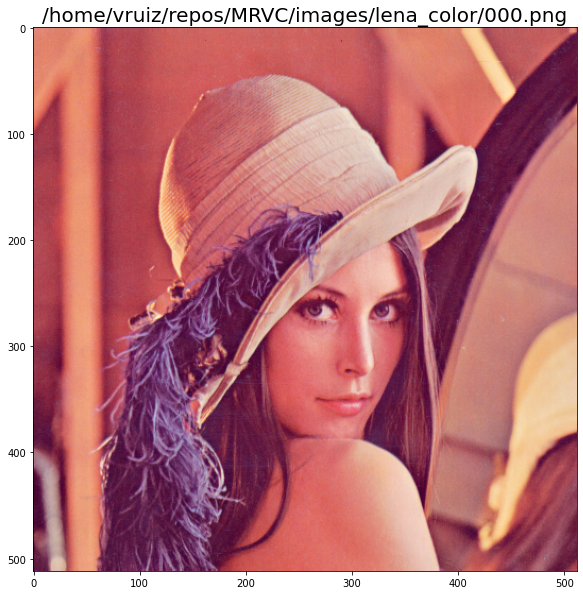

In [14]:
RGB_img = RGB_image.read(fn).astype(image_dtype)
RGB_image.show(RGB_img, fn + "000.png")

## Example

In [32]:
# Create a K-means clustering tool
normalized_img = np.array(RGB_img,dtype=np.float64) / 255
w, h, d = shape_of_img = tuple(RGB_img.shape)
img_reshaped = normalized_img.reshape((w*h, d))
kmeans = KMeans(n_clusters=32, random_state=0)
some_samples = shuffle(img_reshaped, random_state=0, n_samples=1_000)

In [33]:
# Find centroids in clusters (CPU intensive)
kmeans.fit(some_samples)

KMeans(n_clusters=32, random_state=0)

[image_3.py:84 print_stats() INFO] component=0 max=0.9573529411764705 min=0.31889048302247736 avg=0.7067673870931227
[image_3.py:84 print_stats() INFO] component=1 max=0.8383753501400559 min=0.04887613582018163 avg=0.3885083158972361
[image_3.py:84 print_stats() INFO] component=2 max=0.7801120448179271 min=0.03137254901960784 avg=0.41166167375917423


int32


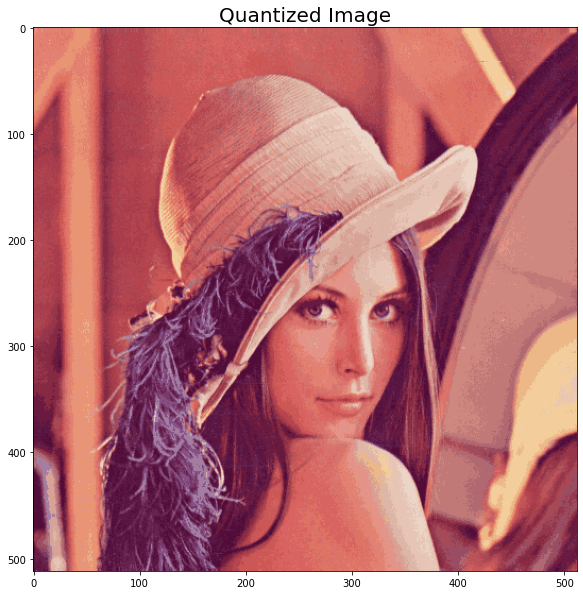

In [37]:
# Quantize
centroids = kmeans.cluster_centers_
labels = kmeans.predict(RGB_img_reshaped)
VQ_img = centroids[labels].reshape(w, h, -1)
RGB_image.show(VQ_img, "Quantized Image")

## RD performance

Quantization indexes:  [0 1]


[image_1.py:48 write() INFO] image_1.write: /tmp/2_000.png (262144,) uint8 len=10819 max=1 min=0


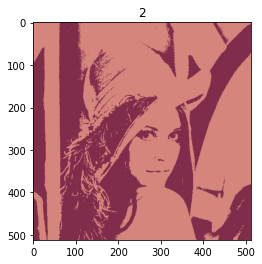

n=  2, rate=0.11005655924479167 bits/pixel, distortion=  27.8
Quantization indexes:  [0 1 2 3]


[image_1.py:48 write() INFO] image_1.write: /tmp/4_000.png (262144,) uint8 len=23588 max=3 min=0


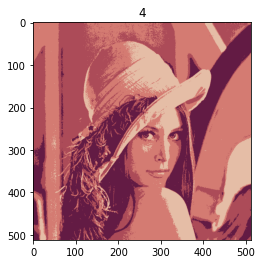

n=  4, rate=0.23994954427083334 bits/pixel, distortion=  16.6
Quantization indexes:  [0 1 2 3 4 5 6 7]


[image_1.py:48 write() INFO] image_1.write: /tmp/8_000.png (262144,) uint8 len=36443 max=7 min=0


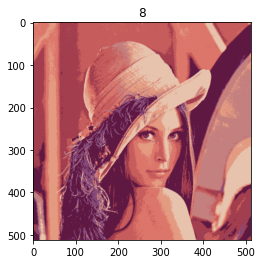

n=  8, rate=0.3707173665364583 bits/pixel, distortion=  11.9
Quantization indexes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


[image_1.py:48 write() INFO] image_1.write: /tmp/16_000.png (262144,) uint8 len=58241 max=15 min=0


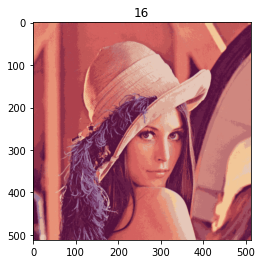

n= 16, rate=0.5924580891927084 bits/pixel, distortion=   8.5
Quantization indexes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


[image_1.py:48 write() INFO] image_1.write: /tmp/32_000.png (262144,) uint8 len=90063 max=31 min=0


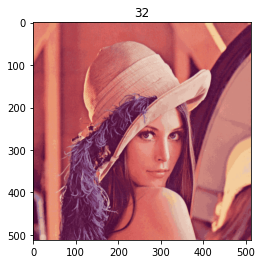

n= 32, rate=0.916168212890625 bits/pixel, distortion=   6.6
Quantization indexes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


[image_1.py:48 write() INFO] image_1.write: /tmp/64_000.png (262144,) uint8 len=122247 max=63 min=0


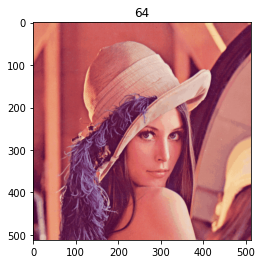

n= 64, rate=1.243560791015625 bits/pixel, distortion=   5.3
Quantization indexes:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]


[image_1.py:48 write() INFO] image_1.write: /tmp/128_000.png (262144,) uint8 len=163736 max=127 min=0


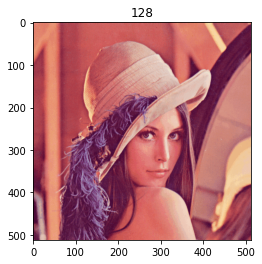

n=128, rate=1.6656087239583333 bits/pixel, distortion=   4.4


In [47]:
def RD_curve(img, range_of_N_bins):
    normalized_img = np.array(RGB_img,dtype=np.float64) / 255
    w, h, d = shape_of_img = tuple(RGB_img.shape)
    img_reshaped = normalized_img.reshape((w*h, d))
    points = []
    for n in range_of_N_bins:
        kmeans = KMeans(n_clusters=n, random_state=0)
        some_samples = shuffle(img_reshaped, random_state=0, n_samples=1_000)
        kmeans.fit(some_samples)
        centroids = kmeans.cluster_centers_
        labels = kmeans.predict(RGB_img_reshaped)
        k = labels.astype(np.uint8) # Up to 256 bins
        y = (centroids[k].reshape(w, h, -1) * 255).astype(np.uint8)
        print("Quantization indexes: ", np.unique(k))
        rate = gray_image.write(k, "/tmp/" + str(n) + '_', 0)*8/img.size
        _distortion = distortion.RMSE(img, y)
        plt.title(f"{n}")
        plt.imshow(y, cmap=plt.cm.gray, vmin=0, vmax=256)
        plt.show()
        points.append((rate, _distortion))
        print(f"n={n:>3}, rate={rate:>7} bits/pixel, distortion={_distortion:>6.1f}")
    return points

RD_points = RD_curve(RGB_img, range_of_N_bins)

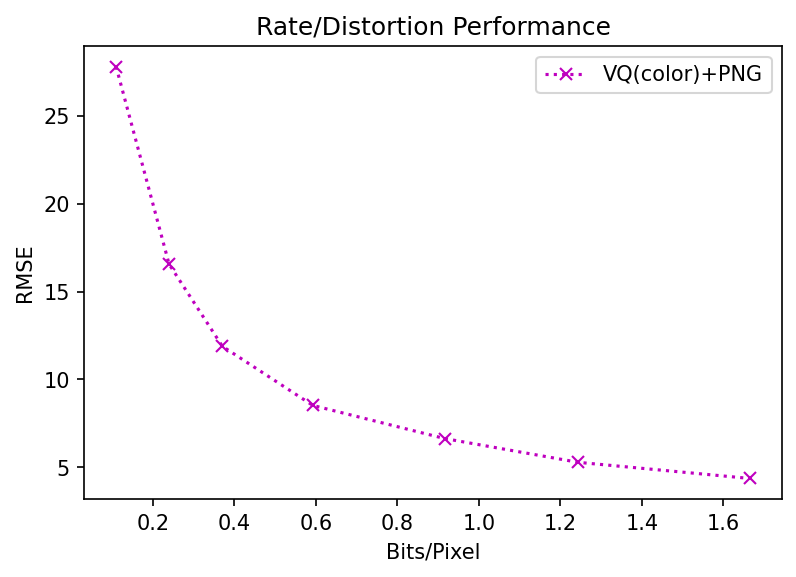

In [48]:
pylab.figure(dpi=150)
#pylab.scatter(*zip(*RD_points), label=f"VQ+PNG", s=1, marker='.')
pylab.plot(*zip(*RD_points), c='m', marker='x', label=f"VQ(color)+PNG", linestyle="dotted")
pylab.title(f"Rate/Distortion Performance")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("RMSE")
pylab.legend(loc='upper right')
pylab.show()

## Write

In [49]:
with open(f"RGB_VQ.txt", 'w') as f:
    for item in RD_points:
        f.write(f"{item[0]}\t{item[1]}\n")

## Compare to SQ

In [50]:
def load(path):
    curve = []
    with open(path, 'r') as f:
        for line in f:
            rate, _distortion = line.split('\t')
            curve.append((float(rate), float(_distortion)))
    return curve

In [51]:
SQ_color = load("../RGB_SQ/RGB_SQ.txt")

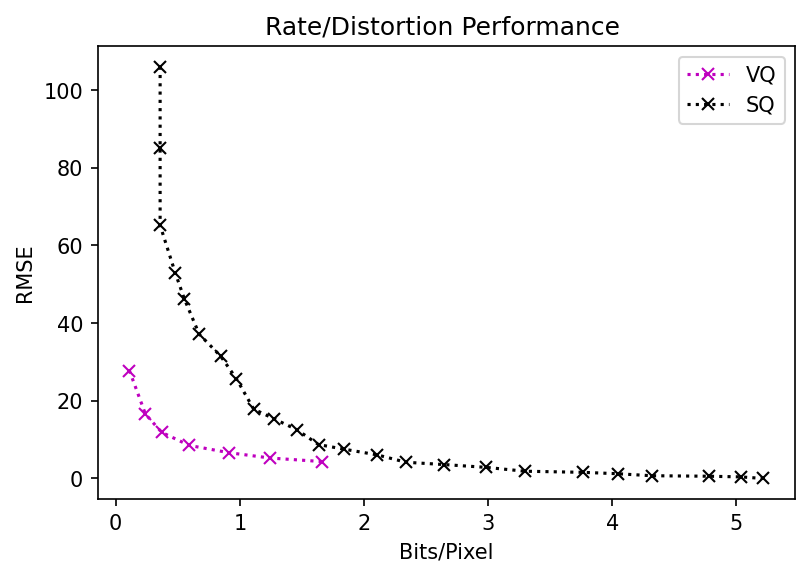

In [53]:
pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points), c='m', marker='x', label="VQ", linestyle="dotted")
pylab.plot(*zip(*SQ_color), c='k', marker='x', label="SQ", linestyle="dotted")
pylab.title("Rate/Distortion Performance ")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("RMSE")
pylab.legend(loc='upper right')
#pylab.xscale("log")
#pylab.yscale("log")
pylab.show()

In [ ]:
if 'google.colab' in str(get_ipython()):
    %run ./deadzone.ipynb
    deadzone_RD = load("./dead-zone_RD_points.txt")
    print("loaded ./dead-zone_RD_points.txt")
elif not os.path.exists("../scalar_quantization/dead-zone_RD_points.txt"):
    %run ../scalar_quantization/deadzone.ipynb
    deadzone_RD = load("../scalar_quantization/dead-zone_RD_points.txt")
    print("loaded ../scalar_quantization/dead-zone_RD_points.txt after regenerating the file")
else:
    deadzone_RD = load("../scalar_quantization/dead-zone_RD_points.txt")
    print("loaded ../scalar_quantization/dead-zone_RD_points.txt without regenerating the file")